In [1]:
import os

import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# MovieLens 100K를 데이터셋을 불러옵니다.
df_ratings = pd.read_csv('dataset/ratings_100k.csv')
df_ratings['date'] = df_ratings.pop('timestamp').pipe(lambda x: pd.to_datetime(x, unit='s'))
df_user = pd.read_csv('dataset/users_100k.csv', index_col='user id')
df_movie = pd.read_csv('dataset/movies_100k.csv', index_col='movie id')

display(df_ratings.head())
display(df_user.head())
display(df_movie.head())

,user id,item id,rating,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# 머신 러닝(기계 학습, Machine Learning)

추천 시스템을 이해하기 위한 머신 러닝에 대한 전반적인 배경 지식을 살펴 봅니다.

**정의**: 연산 장치(Computer)로 명시적인 알고리즘(특정 목적을 맞춘 컴퓨터 프로그래밍) 없이 데이터를 통해 성능을 향상시키는 방법을 연구하는 분야

**fit(train)** → **predict(test) / transform(test)**

# 머신러닝 모델(Machine Learning  Model)

- 데이터에서 추출한 지식(패턴)을 연산 장치(컴퓨터)에 근사화한 객체

Ex) 기울기가 1 이고 절편이 5인 직선의 관계를 지니고 가우시안 노이즈가 있는 데이터를 100개 생성해봅니다. 

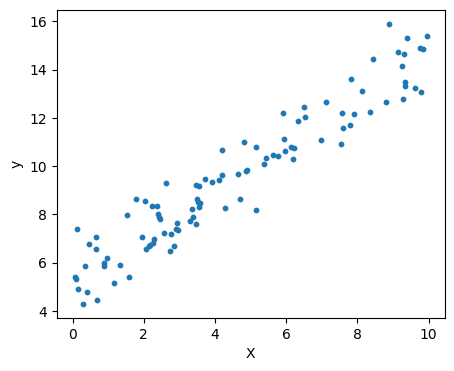

In [3]:
a, b= 1, 5
X = np.random.random(size=100) * 10
y = X * a + b + np.random.normal(size=100) # 표준 정규 분포를 따르는 노이즈를 더하여 기울기가 a 이고 절편이 b 인 관계를 지니는 데이터 포인트를 만듭니다.
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

**모델**: 직선  

y = aX + b을 사용하여 X, y 의 관계를 나타냅니다.

이 케이스는 a, b를 알고 있으니(a = 1 , b = 5) 이를 이용하여 나타내 봅니다. 

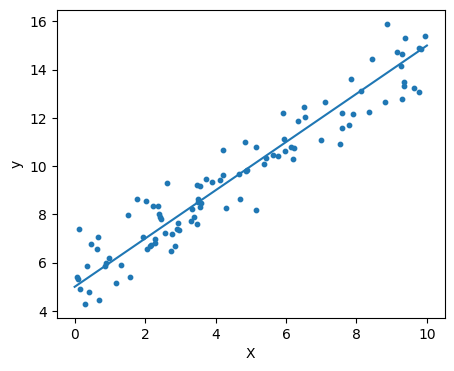

In [4]:
a, b = 1, 5
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

## 손실(Loss)

**근사화**에 의해 발생한 실제(actual) 데이터와의 오차를 정량화 : 클수록 실제데이터와 차이가 많이 남을 뜻합니다.


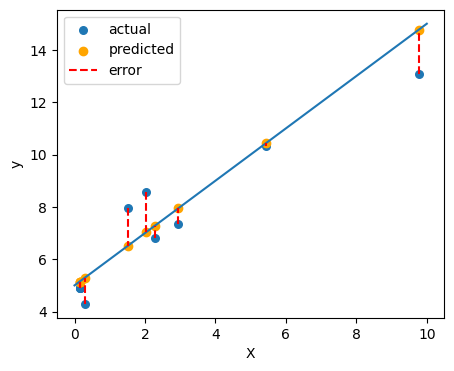

In [5]:
# 도식화를 10개만 뽑아 냈습니다.

idx_10 = np.random.choice(np.arange(100), 10)
X, y = X[idx_10], y[idx_10]
plt.figure(figsize=(5, 4))
plt.plot((0, 10), (a * 0 + b, a * 10 + b))
plt.scatter(X, y, s=30, label='actual')
plt.scatter(X, X * a + b, color='orange', label='predicted')
plt.vlines(X, y, X * a + b, linestyles='dashed', color='red', label='error')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.legend()
plt.show()

In [6]:
pd.DataFrame(
    {'X': X, 'y': y}
).assign(
    y_hat = lambda x: X * a + b
).assign(
    error = lambda x: x['y'] - x['y_hat'], # 오차
).assign(
    absolute_error = lambda x: x['error'].abs(), # 절대 오차
    squared_error = lambda x: x['error'] ** 2 # 제곱 오차
)

,X,y,y_hat,error,absolute_error,squared_error
0,0.147223,4.891065,5.147223,-0.256159,0.256159,0.065617
1,9.777450,13.083723,14.777450,-1.693727,1.693727,2.868712
2,2.950298,7.339805,7.950298,-0.610493,0.610493,0.372702
3,1.520418,7.957155,6.520418,1.436737,1.436737,2.064213
4,0.283956,4.299737,5.283956,-0.984219,0.984219,0.968686
5,0.147223,4.891065,5.147223,-0.256159,0.256159,0.065617
6,2.022639,8.563126,7.022639,1.540487,1.540487,2.373100
7,2.272975,6.817122,7.272975,-0.455853,0.455853,0.207802
8,5.436647,10.331835,10.436647,-0.104812,0.104812,0.010986
9,0.147223,4.891065,5.147223,-0.256159,0.256159,0.065617


**error**, **absolute_error**, **squared_error** 에서 Loss로 사용할 수 있는 것은?

> absolute_error

> squared_error


## 학습 (Train)

데이터의 **손실**을 최소화 시키도록 모델을 찾는 과정입니다.

# 머신러닝(Machine Learning)의 종류

## 지도 학습(Supervised Learning)

- 머신러닝 모델을 정답이 주어진 데이터로 학습(Training)을 시키는 것

### 회귀 (Regression)

- 정답이 수치형

Ex) 사용자의 아이템에 대한 평점을 예측

### 분류 (Classfication)

- 정답이 범주

Ex) 사용자가 아이템을 좋아요/싫어요 피드백을 예측

## 비지도 학습(Unsupervised Learning)

- 머신러닝 모델을 정답이 주어지지 않은 데이터로 학습(Training)을 시키는 것

## 성능 지표(Performance Metric)

- 머신러닝 모델을 평가하는 기준

- Metric과 Loss는 같을 수도 있고, 다를 수도 있습니다. 
  
  Metric과 Loss가 다른 과제는 Loss를 낮추는 것이 Metric을 낮추는 것을 보장하지 않기 때문에 이 갭을 메꾸기 위한 방법이 필요합니다.

### 회귀

  - Mean Squared Error(MSE)
  
    > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
    
  - Mean Absolute Error(MAE)
  
    > $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
    
  - R2 Score
  
    > $R^2 = 1 - \frac{MSE}{VAR(y)}$
  
### 분류

  - 정확도(Accuracy)
    
    > $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
  
  - 정밀도(Precision)
  
    > $Precision = \frac{TP}{TP + FP}$
  
  - 재현율(Recall)
    
    > $Recall = \frac{TP}{TP + FN}$
    
## 모델 검증 

모델이 실제 상황에서 얼만큼의 성능을 발휘할지를 측정하는 과정입니다.

  - 홀드아웃(Hold-out) 검증: 학습(Train)/검증(Validation) 단순 분리

  - 교차 검증 (Cross-Validation)

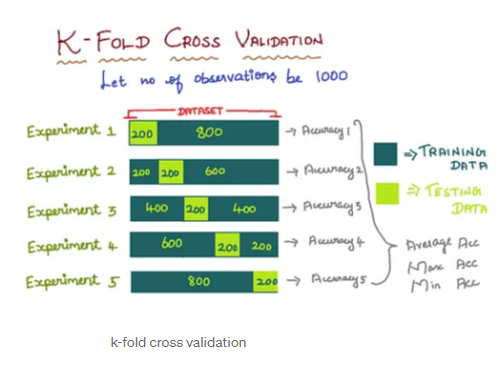

# 기계학습의 궁극 목표

- 실제 투입이 되었을 때 성능이 좋은 머신러닝 모델을 만드는 것 → 일반화(Generalization)

  > 학습 데이터를 통해 일반화(Generalized)된 머신러닝 모델을 만드는 것
  
  > 과적합(Over-fit): 학습데이터에 모델이 지나치게 맞추어져 학습데이터에 치우치게 되어 실제 데이터에 대한 성능이 떨어지게 되는 현상입니다.
  
  > 과소적합(Under-fit): 학습데이터에 모델이 덜 맞추어져 현상을 제대로 모델이 담지 못하여 실제 데이터에 대한 성능이 떨어지게 되는 현상입니다.
    
  ⇒ 모델이 투입이 되는 상황에 맞춰어 평가(Test) 체계를 만들고, 이에 맞추어 모델을 검증
  
  ⇒ 속성 공학 - 파생 변수 생성, 차원 축소, 스캐일링, ... 
  
  ⇒ 최적합 모델을 도출 - 모델 튜닝, 앙상블, ...

# 용어 정의

> 대상 변수(Target Variable) - 지도학습에서 정답에 해당하는 변수

> 입력 변수(Input Variable) - 기계학습 모델에 입력 변수

> 모수 (Parameter) - 모집단이 지니는 특징을 나타내는 수. 모평균 / 모분산 ...

> 가중치 (Weight) - 인공신경망에서의 모수(Parameter)

> 손실 (Loss) - 모델링을 통해서 발생한 실제 현상에 대한 정보 손실


# 머신러닝 모델 (Machine Learning Model)

## 모수적 모델(Parametric Model)

모집단의 지식(패턴)을 나타내는 함수로 나타낸 모델

- Ex) 선형 모델, 신경망 모델

- 학습: 학습 데이터를 통해 함수의 모수를 추정하는 것

  ⇒  학습 데이터에 대한 모델의 손실을 최소화하는 모수를 찾는 것

### 모수적 모델의 손실

회귀: Mean Squared Error

  > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$

분류: Cross Entropy 

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  이진분류일 경우 다음과 같이 축약할 수 있습니다.

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

### 모수적 모델의 규제

- 학습셋에 적합시키는 정도를 제한하기 위한 방법

모수의 크기(Magnitude)의 합을 규제 계수와 곱하고 손실 함수에 더합니다.

모수의 크기(Magnitude)가 커질 수록 손실이 커지게 되므로,

모수의 크기(Magnitude)가 커지는 것이 억제됩니다.

규제 계수의 크기에 따라 규제의 강도를 조절할 수 있습니다.

> L1-norm: 모수의 절대값의 합을 손실 함수에 반영

> L2-norm: 모수의 제곱의 합을 손실 함수에 반영

### 선형 회귀 모델(Linear Regression)

대상 변수를 선형 함수로 나타낸 모델

$\hat{y_i} = \hat{\beta}_1x_{i1} + \hat{\beta}_2x_{i2} + ... + \hat{\beta}_nx_{in} + \hat{\beta}_0$

<=> $\hat{y} = X \hat{\beta} + \hat{\beta}_0$

**학습 알고리즘**

  1.정규방정식(OLS, Ordinary Least Square)
  
  정규방정식의 해 아래와 같이 닫힌 형태로 구할 수 있습니다.
  
  $\hat{\beta} = (X^T X)^{-1} X^T y$
  
  2.경사하강법(Gradient Descent)
  
  - 손실(Loss)에 대한 모수의 기울기(Gradient)를 측정하여 손실(Loss)을 낮추는 방향으로 모수를 찾아가는 방법
  
  $Loss = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
  
  $\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

#### **예제: 선형회귀 모델의 학습**

In [7]:
from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1,  # 입력 변수는 한 개로 합니다,
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

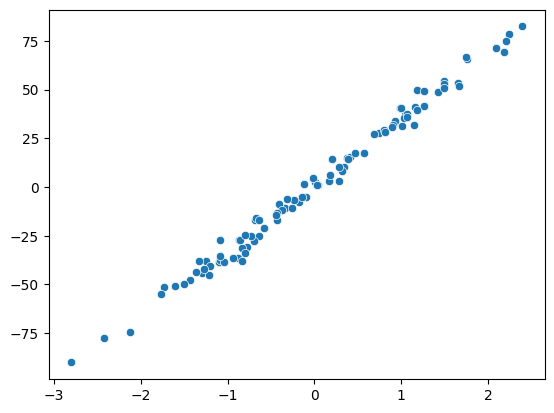

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 변수와 대상 변수를 산포도 그래프로 출력합니다.
sns.scatterplot(x = X[:, 0], y = y)
plt.show()

**1. OLS(Ordinary Least Square)**

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [11]:
# Linear Regression의 상수항(beta_hat_0)을 행렬연산에 포함시켜 구하기 위해 모두 1인 입력변수를 추가합니다.
X_1 = np.hstack([X, np.ones((X.shape[0], 1))])
# 처음 5행만 출력합니다.
X_1[:5]

array([[-0.09470897,  1.        ],
       [-1.25388067,  1.        ],
       [ 0.00284592,  1.        ],
       [ 1.03972709,  1.        ],
       [-0.43435128,  1.        ]])

In [16]:
# OLS를 통한 Linear Regression 모델 학습
X_gram = np.dot(X_1.T, X_1) # X^T, X 행렬곱을 합니다.
X_gram_inv = np.linalg.inv(X_gram) # X_gram의 역행렬을 구합니다.
beta_hat = np.dot(np.dot(X_gram_inv, X_1.T), y) # TODO with # beta_hat을 구합니다.
beta_hat

array([33.9064697 ,  0.96504735])

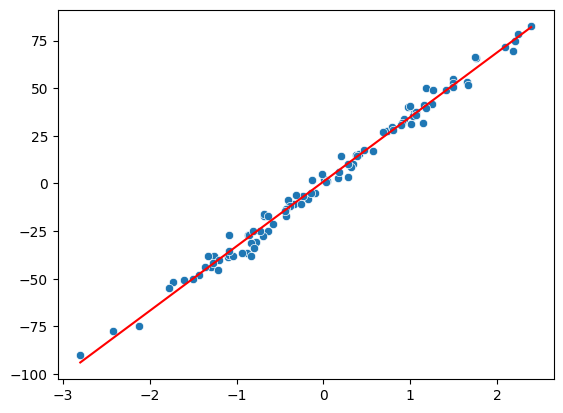

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    """
    return np.dot(X_1, beta_hat)

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)
    
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**2. 경사하강법(Gradient Descent)**

  $\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

손실에 대한 회귀 계수의 미분을 이용한 경사(기울기)를 계산하여 손실이 줄어드는 방향으로

계수를 업데이트하여 선형 회귀 모델의 계수 (선형 회귀 계수)를 구해봅니다.

In [18]:
# 초기화: (-1, 1) 사이의 임의의 2개의 실수를 만듭니다.
beta_hat = np.random.uniform(-1, 1, 2)
beta_hat

array([0.654784  , 0.83099718])

경사도를 구하기 위해 일부분만 가져옵니다.

$\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [22]:
# 먼저 y_hat: 예측값을 구해봅니다.
y_hat = np.dot(X_1, beta_hat)

In [23]:
np.sum(np.expand_dims(y - y_hat, -1) * X_1, axis=0)

array([4235.50245688,  103.54725692])

$\sum_{i=1}^{n}{a_i b_i} = a \cdot b$ 임을 이용하여 연산을 줄여 봅니다.

In [24]:
np.dot(y - y_hat, X_1)

array([4235.50245688,  103.54725692])

$\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [25]:
beta_hat_grad = -2 * np.dot(y - y_hat, X_1) / X_1.shape[0]
beta_hat_grad

array([-84.71004914,  -2.07094514])

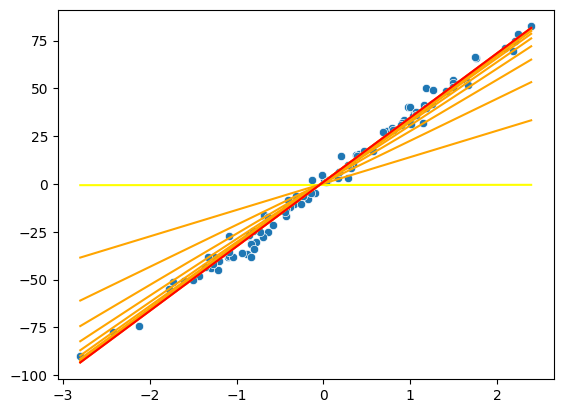

In [26]:
beta_hat = np.random.uniform(-1, 1, 2) #  -1, 1 사이의 임의 수 2개를 생성합니다.
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='yellow')

learning_rate = 0.02 # 학습율(속도)
# Epoch마다 손실(loss)을 기록하기 위한 리스트
losses = []
for epoch in range(100):
    y_hat = np.dot(X_1, beta_hat) # 현재 회귀 계수의 X_1에 대한 예측 값을 구합니다.
    beta_hat_grad = - 2 * np.dot((y - y_hat), X_1) / X_1.shape[0] # 회귀 계수들의 경사도를 구합니다.
    
    beta_hat -= beta_hat_grad * learning_rate # 회귀 계수를 업데이트 합니다.
    
    # 10 epoch 마다 회귀선을 출력합니다.
    if (epoch + 1) % 10 == 0:
        plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='orange')

    loss = np.mean(np.square(y - np.dot(X_1, beta_hat))) # Loss Function: Mean Squared Error를 계산합니다.
    
    losses.append(loss)
# 최종 학습된 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

In [27]:
beta_hat

array([33.72489378,  0.97832048])

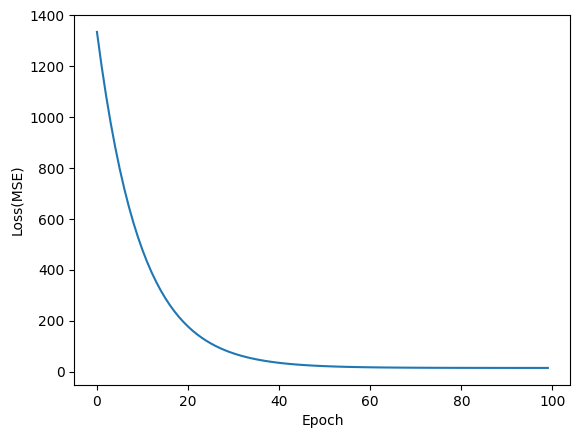

In [28]:
# 경사하강법의 반복횟수(Epoch)에 따른 손실을 출력합니다.
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

In [29]:
from sklearn.linear_model import SGDRegressor
reg_sgd = SGDRegressor().fit(X, y)
reg_sgd.coef_, reg_sgd.intercept_

(array([33.89413167]), array([0.97296223]))

- Ridge 모델: Linear Regression에 L2 규제를 적용한 모델

- Lasso 모델: Linear Regression에 L1 규제를 적용한 모델 

- Elastic Net: Linear Regression에 L1/L2 규제를 적용한 모델

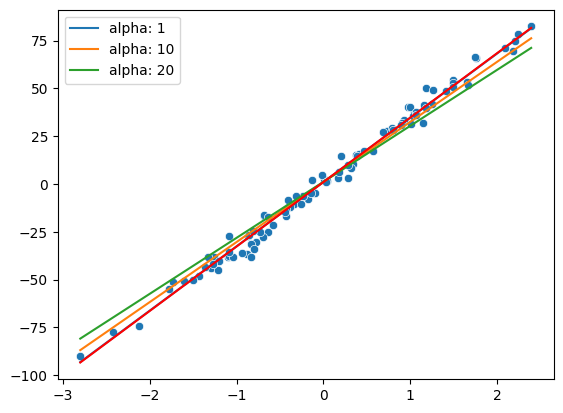

In [30]:
from sklearn.linear_model import Ridge

sns.scatterplot(x = X[:, 0], y = y)
# 규제의 강도(1, 10, 20)에 따른 선형 회귀선을 출력합니다.
for alpha in [1, 10, 20]:
    reg_rd = Ridge(alpha=alpha)
    reg_rd.fit(X, y)
    plot_linear_model(X[:, 0].min(), X[:, 0].max(), np.array([reg_rd.coef_[0], reg_rd.intercept_]), label='alpha: {}'.format(alpha))
    y_hat = reg_rd.predict(X)
    losses.append(np.mean(np.square(y - y_hat)))
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**Tensorflow**

**Tensor란?**

n차원 배열 (n이 0이면 단일수, n이 1이면 Vector, n이 2이면 Matrix, n이 3이면 Cube, ...

머신러닝 관점에서 Tensorflow를 한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.

Matrix Factorization은 모수적 모델입니다. 

이 후 파트에서는 Tensorflow를 통한 모델링 학습이 주를 이룹니다.

이를 위해 Tensorflow에 익숙해져 보기 위해 예를 들어 봅니다.

In [31]:
# TF_CPP_MIN_LOG_LEVEL: Tensorflow에서 출력할 로그의 수준을 지정합니다. 
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다. 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

2024-09-25 15:51:15.133297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 15:51:15.454842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 15:51:15.546881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [32]:
# 장치의 GPU 현황을 조사합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1727247110.391679   67722 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727247110.880585   67722 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727247110.880748   67722 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727247110.891254   67722 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727247110.891441   67722 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [33]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
class LRModel(tf.keras.Model):
    def  __init__(self):
        super().__init__()
        # 출력이 한 개인 밀도 레이어 단층의 신경망
        # Dense Layer에는 입력변수 × 출력변수 형태의 가중치 행렬(Weight Matrix)와 절편(Intercept)이 있습니다.
        # 출력 변수가 1개인 Dense Layer를 생성합니다.
        self.beta_hat = tf.keras.layers.Dense(1)

    def call(self, X):
        y_hat = self.beta_hat(X) # X를 beta_hat Layer에 통과 시켜 예측값을 구합니다.
        return y_hat

# Tensorflow 세션 초기화
tf.keras.backend.clear_session()
# 모델 생성합니다. 
lr_model = LRModel()

In [34]:
# 모델의 구동을 확인해봅니다.
lr_model(tf.constant([[1.0], [2.0], [3.0]]))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.44055974],
       [0.8811195 ],
       [1.3216792 ]], dtype=float32)>

In [38]:
# Dense Layer의 Weight는  입력 텐서[-1] x 출력 텐서[-1]의 weight와 출력 텐서[-1]의 절편으로 구성 돼있습니다.
lr_model.beta_hat.get_weights()[0] * tf.constant([[1.0], [2.0], [3.0]]) + lr_model.beta_hat.get_weights()[1] 

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.44055974],
       [0.8811195 ],
       [1.3216792 ]], dtype=float32)>

In [39]:
# Dense Layer의 가중치 곧 선형 회귀 모델 관점에서 모수를 확안해 봅니다.
lr_model.beta_hat.get_weights()

[array([[0.44055974]], dtype=float32), array([0.], dtype=float32)]

In [40]:
lr_model.summary()

Model: "lr_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (3, 1)                 │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Keras**

Deep Learning Framework - Deep Learning을 위한 요소들을 틀로써 정의

**학습 방법 1: Train Loop를 통한 학습**

In [42]:
# 손실함수를 생성합니다.
mse = tf.keras.losses.MeanSquaredError()
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adaptive Gradient Descent 최적화기
optimizer = tf.keras.optimizers.Adagrad(learning_rate=2.0) # 학습율을 2로 설정합니다.
@tf.function
def train_step(X, y):
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다. 이를 통해 경사도가 계산됩니다.
    with tf.GradientTape() as tape:
        y_hat = lr_model(X)
        loss = mse(y, y_hat)
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = lr_model.trainable_variables
    # 가중치에 대한 경사도를 구합니다.
    gradients = tape.gradient(loss, variables)
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

**Auto Diff.** :머신 러닝 관점에서 Tensorflow의 핵심 기능 모델의 계수(가중치, Weight)들의 손실에 대한 경사도를 구해줍니다.

**Tensorflow의 모델 구동 방식**

- Eager Execution - 정의된 연산 단계를 즉각적으로 실행

- Graph Execution - Graph로 표현된 연산 단계를 최적화하여 실행

@tf.function - 지정한 함수안에 연산들을 Graph Execution 방법으로 구동 시키도록합니다.

**Batch** - 데이터를 지정한 숫자 만큼을 나누어 전달토록 합니다.

> 전체 데이터에서 Batch 단위로 나누어 Gradient를 구하게 하여 보다 빠르게 학습을 유도합니다. 

In [43]:
# Tensorflow 용 Dataset으로 만들어 줍니다. # batch - 64개
ds = tf.data.Dataset.from_tensor_slices((X, y)).batch(64)
losses = []
for epoch in range(100):
    losses_epoch = []
    for X_, y_ in ds:
        losses_epoch.append(train_step(X_, y_).numpy())
    losses.append(np.mean(losses_epoch))

In [44]:
lr_model.beta_hat.get_weights()

[array([[32.017273]], dtype=float32), array([1.1035702], dtype=float32)]

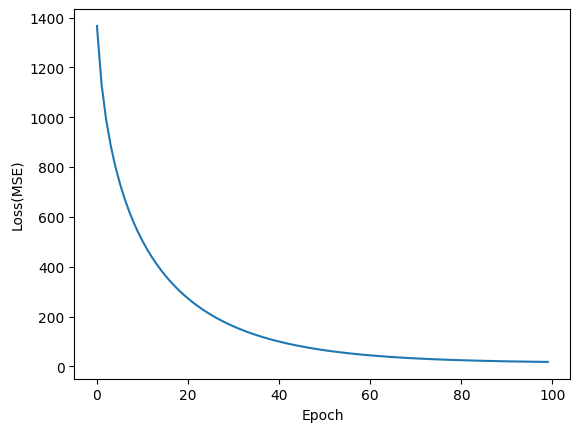

In [45]:
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

**학습 방법 2: fit 메소드를 통한 학습**

compile ~ fit 루틴

compile: 모델 학습에 필요한 설정을 합니다.

fit: 데이터셋에 대한 학습 작업을 수행시킵니다.

In [46]:
# lr_model을 학습하기 위한 설정을 합니다.
lr_model = LRModel()

lr_model.compile(
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=2.0), # 경사하강 알고리즘을 셋팅합니다: Adaptive Gradient Descent
    loss= tf.keras.losses.MeanSquaredError(), # 손실함수를 설정합니다.
    metrics=[tf.keras.metrics.MeanSquaredError(name='mse')] # mse: Mean Squared Error 모델 성능 측정지표를 성정합니다.
)

# epochs: 최적화 루팅 반복 회수, 100회
# verbose: 0 - 중간 결과 출력을 생략합니다.
# 확습을 시킵니다.
hist = lr_model.fit(ds, epochs=100, verbose=0)

I0000 00:00:1727247856.853479   84195 service.cc:146] XLA service 0x7f97d8023b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727247856.853527   84195 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
I0000 00:00:1727247857.513210   84195 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


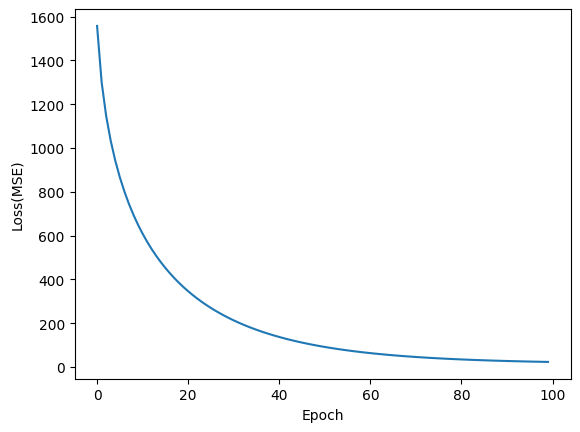

In [47]:
sns.lineplot(hist.history['mse'])
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

**Gradient Descent의 의미**

1. Loss에 대한 모수의 기울기만 구할 있다면,  모든 모수 모델에 대하여 적용이 가능합니다.

2. 데이터 스트림을 통한 학습이 가능합니다. 

  > 모델 학습 시 전체 데이터를 메모리에 올리지않고, 학습에 필요한 Batch 단위로 나누어 진행합니다.
  
  > 대규모의 학습 데이터를 입력으로 사용 가능합니다.


#### 실습: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점 예측기를 만들어 봅시다. 

지표: R2

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation


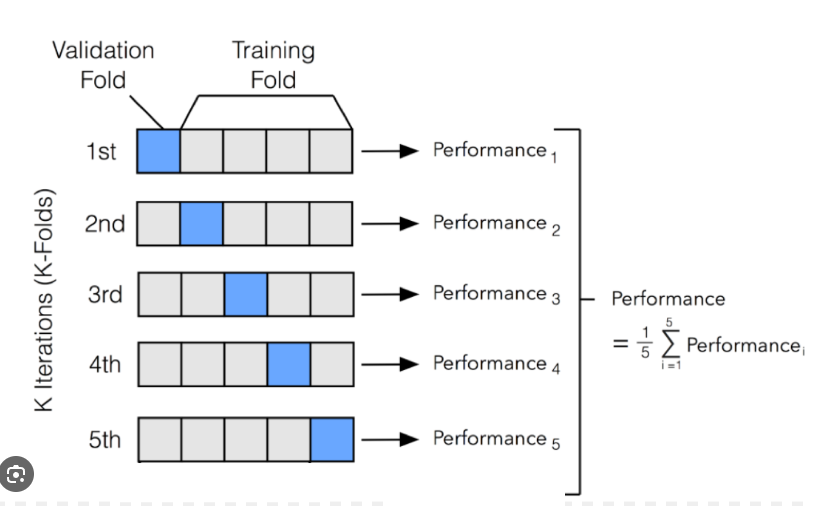

### **선형 회귀**모델을 이용한 초간단 평점 예측 모델

MovieLens 100K에서  80%는 학습, 20%는 평가데이터로 구성합니다. 

입력변수: 사용자별 rating 평균, 영화별 rating 평균

로 하여 rating(평점)을 맞추는 선형회귀 모델을 학습하고 평가해봅니다.

In [51]:
from sklearn.model_selection import train_test_split
# 학습:평가 = 8:2로 하여 학습/평가를 셋을 합니다.
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)

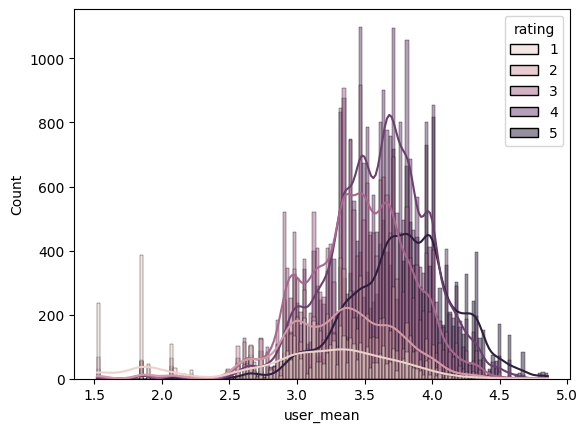

In [74]:
s_user_mean = df_train.groupby('user id')['rating'].mean()
df_train.assign(
    user_mean = lambda x: x['user id'].map(s_user_mean),
)[['user_mean', 'rating']].pipe(
    lambda x: sns.histplot(x, x = 'user_mean', hue = 'rating', kde=True)
)
plt.show()

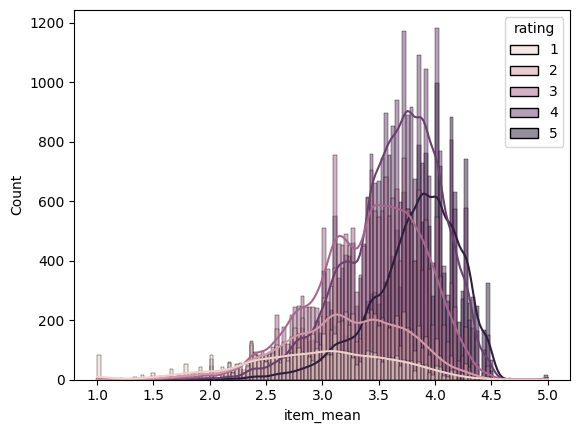

In [75]:
s_item_mean = df_train.groupby('item id')['rating'].mean()
df_train.assign(
    item_mean = lambda x: x['item id'].map(s_item_mean),
)[['item_mean', 'rating']].pipe(
    lambda x: sns.histplot(x, x = 'item_mean', hue = 'rating', kde=True)
)
plt.show()

In [52]:
df_train.shape, df_test.shape

((80000, 4), (20000, 4))

**TargetEncoder**

범주형 변수를 수준별 대상값에 대한 평균으로 인코딩해주는 전처리기 입니다.

In [80]:
from sklearn.preprocessing import TargetEncoder
tgt = TargetEncoder(target_type = 'continuous')
tgt.fit(df_train[['user id', 'item id']], df_train['rating'])
tgt.transform(df_train[['user id', 'item id']])[:5]

array([[3.39303134, 3.43011389],
       [3.72487552, 4.23383989],
       [3.38681329, 3.62972923],
       [3.98684472, 3.88208099],
       [4.17601163, 4.01981339]])

In [78]:
pd.concat([
    df_train.groupby('user id')['rating'].transform('mean').rename('user_mean'),
    df_train.groupby('item id')['rating'].transform('mean').rename('item_mean')
], axis=1).head()

,user_mean,item_mean
22302,3.392749,3.429577
49609,3.727273,4.237037
89251,3.386454,3.630435
96385,3.988571,3.883249
17569,4.177966,4.022059


**Pipeline**

단계별 데이터 처리 과정들을 결합하여 하나의 모델로 만듭니다.

Ex) TargetEncoder + LinearRegression

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
reg_lr = make_pipeline( # 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
    TargetEncoder(target_type='continuous', cv=2), # 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
    LinearRegression() # 선형 회귀 모델 
)
# 학습
reg_lr.fit(df_train[X_lr], df_train['rating'])
# 예측
r2_score(
    df_test['rating'],
    reg_lr.predict(df_test[X_lr])
)

0.2742393985934716

In [100]:
reg_lr.predict(df_test[X_lr])

array([3.96368086, 4.0042112 , 4.18725932, ..., 4.04311997, 3.76778972,
       2.64656375])

In [90]:
reg_lr[1].coef_, reg_lr[1].intercept_

(array([0.78225523, 0.77677522]), -1.9838022735649226)

In [95]:
s_user_mean = df_train.groupby('user id')['rating'].mean()
s_item_mean = df_train.groupby('item id')['rating'].mean()
pd.concat([
    df_test['user id'].map(s_user_mean).rename('user_mean'),
    df_test['item id'].map(s_item_mean).rename('item_mean')
], axis=1).pipe(
    lambda x: x['user_mean'] * 0.78225523 + x['item_mean'] * 0.77677522 - 1.9838022735649226 
)

42083    3.969226
71825    4.008410
99535    4.188409
47879    3.539593
36734    3.701393
           ...   
93919    3.853143
42000    3.244810
35031    4.044689
42195    3.774922
50824    2.623802
Length: 20000, dtype: float64

**5-fold cross validation**

예제를 통해 이해해 봅니다.

In [101]:
# 처음 5개의 셋만 가져옵니다.
df_train_5 = df_train.iloc[:5]
df_train_5

,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
cv = KFold(5, random_state=1, shuffle=True)
cnt = 1
scores = list()
for train_idx, test_idx in cv.split(df_train_5):
    df_cv_train = df_train_5.iloc[train_idx] # 검증 학습셋
    print("검정 학습셋: {}".format(cnt))
    display(df_cv_train)
    reg_lr.fit(df_cv_train[X_lr], df_cv_train['rating'])

    print("검정  테스트셋: {}".format(cnt))
    df_cv_test = df_train_5.iloc[test_idx] # 검증 테스트셋
    prd = reg_lr.predict(df_cv_test[X_lr]) # 예측합니다.
    display(df_cv_test)
    score = mean_squared_error(df_cv_test['rating'], prd) # 지표 측정합니다.
    scores.append(score)
    print('Validation #{}, MSE: {:.5}'.format(cnt, score)) # 검정 라운드별 성능을 출혁합니다.
    cnt += 1
print(scores, np.mean(scores))

검정 학습셋: 1


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 1


,user id,item id,rating,date
89251,916,746,3,1997-11-29 22:57:42


Validation #1, MSE: 1.0
검정 학습셋: 2


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 2


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39


Validation #2, MSE: 0.0625
검정 학습셋: 3


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02


검정  테스트셋: 3


,user id,item id,rating,date
17569,90,83,5,1998-03-31 22:34:47


Validation #3, MSE: 2.25
검정 학습셋: 4


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 4


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29


Validation #4, MSE: 1.0
검정 학습셋: 5


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 5


,user id,item id,rating,date
96385,892,196,4,1998-02-04 16:27:02


Validation #5, MSE: 0.0625
[1.0, 0.0625, 2.2500000000000013, 0.9999999999999991, 0.06250000000000022] 0.875


**sklearn.model_selection.cross_validate**

상기의 과정을 함수로 구현한 것입니다.

In [103]:
from sklearn.model_selection import KFold, cross_validate
cv = KFold(5, random_state=1, shuffle=True)
cross_validate(
    reg_lr, 
    df_train_5[X_lr], df_train_5['rating'], 
    scoring='neg_mean_squared_error', 
    cv=cv, return_train_score=True
)

{'fit_time': array([0.00560641, 0.0034523 , 0.00265503, 0.00212002, 0.00254798]),
 'score_time': array([0.002033  , 0.00192571, 0.0008738 , 0.00083423, 0.00117755]),
 'test_score': array([-1.    , -0.0625, -2.25  , -1.    , -0.0625]),
 'train_score': array([-2.  , -2.75, -0.25, -0.5 , -2.75])}

In [106]:
# 모델 검증 프로세스부터 구현합니다.
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import r2_score

# 5-fold cross validate splitter를 설정합니다. random_state=123, shuffle=True
cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model(model, df, X):
    # cross_validate를 활용하여 R2 Score를 지표로하고 Splitter는 5-fold cross validate, train_score까지 반환토록하여 model 성능을 측정합니다.
    return cross_validate(
        model,
        df[X], df['rating'],
        scoring = 'r2',
        cv=cv, return_train_score=True
    )

In [108]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X_lr = ['user id', 'item id']
reg_lr = make_pipeline(
    TargetEncoder(target_type='continuous'), # user id, item id에 대한 Target Encoder 를 설정합니다.. target_type = 'continuous': target이 연속형 변수
    LinearRegression() # Target Encoder와 Linear Regression을 결합합니다.
)
result = eval_model(reg_lr, df_train, X_lr)
result

{'fit_time': array([0.03532982, 0.06682944, 0.06725192, 0.06515288, 0.06564856]),
 'score_time': array([0.00483251, 0.00758791, 0.00883651, 0.00754952, 0.0076108 ]),
 'test_score': array([0.27156575, 0.27552138, 0.27208042, 0.26485232, 0.28174758]),
 'train_score': array([0.3230621 , 0.32222626, 0.32280555, 0.32371647, 0.31999136])}

In [109]:
np.mean(result['test_score'])

0.27315349158585234

In [110]:
reg_lr.fit(df_train[X_lr], df_train['rating'])
r2_score(df_test['rating'], reg_lr.predict(df_test[X_lr]))

0.2752650405735191

### 실습: 사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 rating  예측 모델의 기능을 추가해봅니다.

직업과 성별은 OneHotEncoder를 사용합니다. 

그리고 장르는 정르의 해당 여부를 그대로 전달합니다.

In [ ]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_2 = df_train.join(df_user, on='user id').join(df_movie, on='item id')
df_test_2 = df_test.join(df_user, on='user id').join(df_movie, on='item id')
df_train_2.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**OneHotEncoder**

범주형 변수를 수준에 해당하면 1, 그렇지 않으면 0으로 하여 인코딩할 수준 만큼 가변수를 만들어 냅니다.

Ex) 
|gender|
|----|
|M|
|F|
|...|

→ 가변수화

|gender_M|gender_F|
|---|----|
|1|0|
|0|1|
|...|

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
display(df_user.iloc[:5][['gender']])
ohe.fit(df_user[['gender']])
pd.DataFrame(
    ohe.transform(df_user.iloc[:5][['gender']]),
    columns=ohe.get_feature_names_out(['gender'])
)

**ColumnTransformer**

변수별 전처리를 지정할 수 있게합니다. 

|전처리기|변수|
|----|-------|
|TargetEncoder|user id, item id|
|OneHotEncoder|occupation, gender|
|passthrough(통과)|genre 컬럼|

In [ ]:
X_genre = df_movie.columns[2:].tolist()
X_genre

In [ ]:
ct = ColumnTransformer([
    ('tgt', TargetEncoder(target_type='continuous'), ['user id', 'item id']), # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']), # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    ('pt', 'passthrough', X_genre) # Genre 여부는 그대로 모델에 전닿합니다.
])
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
ct.fit(df_train_2[X_lr_2], df_train_2['rating'])
pd.DataFrame(
    ct.transform(df_train_2[X_lr_2]),
    columns=ct.get_feature_names_out()
)

In [ ]:
# ColumnTransformer -변수별 인코딩 방법을 달리 구성하여 처리 단계를 만듭니다.
ct = ColumnTransformer([
    ('tgt', TargetEncoder(target_type='continuous'), ['user id', 'item id']), # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']), # 직업, 성별은 가변수화 합니다. 선형회귀분석을 사용하므로 다중공선성문제를 피하기 위해 수준 하나를 제외하고 가변수화 합니다.
    ('pt', 'passthrough', X_genre) # Genre 여부는 그대로 모델에 전닿합니다.
])
# ColumnTransformer와 LinearRegression을 연결합니다.
reg_lr_2 = make_pipeline(ct, LinearRegression())
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
eval_model(reg_lr_2, df_train_2, X_lr_2)

In [ ]:
from sklearn.metrics import r2_score
# 평가를 진행합니다.
# df_train_2 전체셋으로 학습합니다.
reg_lr_2.fit(df_train_2[X_lr_2], df_train_2['rating'])
r2_score(
    df_test_2['rating'], 
    reg_lr_2.predict(df_test_2[X_lr_2])
)

In [ ]:
# 평가셋(df_test_2)에 대해 r2 score를 구합니다.
r2_score(
    df_test['rating'], 
    reg_lr.predict(df_test[X_lr])
)

## 로지스틱 회귀 (Logistic Regression Model)

선형 회귀 모델로 로지스틱 함수를 통해 \[0, 1\] 실수 영역 즉 확률의 영역을 예측하도록 한 선형 모델

즉, 분류 문제를 선형회귀 모델로 풀 수 있도록 변경한 모델. 

로짓 함수: [0, 1] 확률 영역의 실수를 [-∞, ∞]로 변환해주는 함수

  > $logit(p)= \log(\frac{p}{1-p})$

로지스틱 함수: [-∞, ∞] 실수를 [0, 1] 확률 영역의 실수로 변환해주는 함수: 로짓함수의 역함수

  > $logistic(x)= \frac{1}{1 + e^{-x}}$

SoftMax  함수: 다중클래수 분류를 위한 링크(link)함수

  > $softmax(x_i) = \frac{e^{x_i}}{\sum_j{e^{x_j}}}$, x_i는 i클래스의 로짓
  
손실 함수: Cross Entropy

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$(이진 분류)
  
학습 알고리즘: 경사하강법

In [ ]:
# logistic 함수를 출력해봅니다.

from scipy.special import expit
plt.figure(figsize=(6, 3))
x = np.linspace(-5, 5, 100)
sns.lineplot(x = x, y =  x / 5 + 0.5, label='linear')
sns.lineplot(x = x, y = expit(x), label='logistic')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='black', linestyle='--')
plt.show()

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자가 영화에 평점 여부를 맞추는 모델을 만듭니다.

지표: AUC(Area Under of ROC Curve)

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**로지스틱 회귀**분석을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating을 한 비율, 영화의 rating을 받은 비율

In [ ]:
# 1. user id와 item id를 cross tab을 하여 사용자별 평가 내역이 있으면 1, 없으면 0인 DataFrame을 만듭니다.
# 2. 이를 stack 하여 user id별 item id에 대한 시청 유무를 나타내는 데이터프레임으로 변환합니다.
df_ratings_yn = df_ratings.pivot(index='user id', columns='item id', values='rating')\
        .notna().stack().rename('yn').reset_index()
df_ratings_yn.head()

In [ ]:
df_ratings_yn.shape, df_ratings_yn['yn'].value_counts()

In [ ]:
# 학습셋 8, 평가셋 2의 비율로 나눕니다.
df_train_yn, df_test_yn = train_test_split(df_ratings_yn, train_size=0.8, random_state=123)

**검증 루틴을 만들어 봅니다.**

In [ ]:
# 모델 검증 프로 루틴입니다.
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import roc_auc_score

# 5겹 교차 검증을 세팅합니다.
cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model_yn(model, df, X):
    return cross_validate(
        model, 
        df[X], df['yn'],
        cv=cv, scoring='roc_auc', return_train_score=True
    ) # roc_auc_score를 지표로하는 평가 루틴을 만듭니다. 

**모델 인스턴스를 만듭니다.**

sklearn.linear_model.LogisticRegression을 활용해 봅니다.

In [ ]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

reg_lr = make_pipeline(
    TargetEncoder(target_type='binary'), # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    LogisticRegression()
)
X_lr = ['user id', 'item id']

In [ ]:
# 모델을 평가해봅니다.
eval_model_yn(reg_lr, df_train_yn, X_lr)

In [ ]:
reg_lr.fit(df_train_yn[X_lr], df_train_yn['yn'])
roc_auc_score(
    df_test_yn['yn'],  
    reg_lr.predict_proba(df_test_yn[X_lr])[:, 1] # roc auc는 Positive를 나타내는 Score를 전달합니다. 보통 Positive일 확률입니다.
)

**실습**

사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 yn  예측 모델의 기능을 추가해봅니다.

In [ ]:
# gender, occupation을 활용하기 위에 df_user와 결합합니다.
# genre를 활용하기 위해 df_movie와 결합합니다.
df_train_yn_2 = df_train_yn.join(df_user, on='user id').join(df_movie, on='item id')
df_test_yn_2 = df_test_yn.join(df_user, on='user id').join(df_movie, on='item id')

In [ ]:
X_genre = df_movie.columns[2:].tolist()
"""ct = ColumnTransformer([
    # TODO 1 : TargetEncoder를 사용하여 user id, item id 인코딩 합니다.
    # TODO 2: OneHotEncoder를 사용하여 occupation, gender를 인코딩 합니다. 첫번째 범주는 제외합니다.
    # 장르(X_genre) 는 통과합니다. 
])"""

# reg_lr_2 = ct 와 로지스틱 회귀 모델을 결합하여 모델을 만듭니다.
# X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
# eval_model_yn(reg_lr, df_train_yn_2, X_lr)

In [ ]:
# reg_lr_2.fit(df_train_yn_2[X_lr_2], df_train_yn_2['yn'])
# roc_auc_score(df_test_yn_2['yn'],  reg_lr_2.predict_proba(df_test_yn_2[X_lr_2])[:, 1])

## 인공신경망(Artificial Neural Network)

- 신경세포를 본 딴 모수적 모델

> 선형 회귀 모델이 나타내지 못하는 패턴(Non-Linear 패턴)을 나타낼 수 있습니다.

> 층(Layer): 입력을 처리하여 변환하는 연속된 연산 단위 

> 은닉층 (Hidden Layer): 기본적으로 가중치와 활성화 구성

  유닛(Unit) - 은닉층의 노드수: 은닉층의 출력 변수의 수
 
  가중치(Weight) - 모수(Parameter)에 해당
  
  > 밀도레이어(Dense Layer):  $N_{input} × N_{output}$ 인 행렬
  
  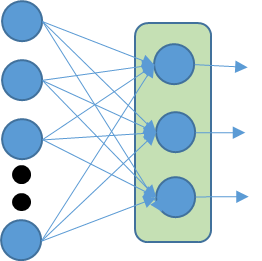
  
  활성화 함수(Activation Function)
  
  > 신경세포의 역치를 나타냄 - 신경세포에 전달된 자극이 다음 신경세포로 전달 되려면 일정 수준이상의 자극이 필요
  
  > 수학적으로는 비선형성을 부여
  
  > Ex) sigmoid / tanh / relu / leaky relu / ... 
  
  
- 학습 알고리즘: 경사하강법

[Tensorflow Playground](https://playground.tensorflow.org/)

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점을 예측기를 만들어 봅시다. 

지표: R2

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**인공신경망**모델을 이용한 초간단 모델을 만들어 봅니다.

첫번째 은닉층의 크기는 16, 두번째 은닉층의 크기는 8로 설정합니다.

입력변수: 사용자의 rating 평균, 영화의 rating 평균, 사용자의 직업, 성별과 영화 장르 정보를 입력 변수

**다층신경망 모델**

sklearn.neural_network.MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    ('tge', TargetEncoder(target_type='continuous'), ['user id', 'item id']),
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']),
    ('pt', 'passthrough', X_genre)
])

reg_mlp = make_pipeline(
    ct, 
    MLPRegressor(hidden_layer_sizes=[16, 8], activation='relu', learning_rate_init=0.001, alpha=0.001, random_state=123)
)
X_mlp = ['user id', 'item id', 'occupation', 'gender'] + X_genre
eval_model(reg_mlp, df_train_2, X_mlp)

### Embedding

문장, 이미지, 음성, 고차원의 범주 등 복잡도가 높은 형태의 데이터를 **저**차원의 연속형 변수로 나타낸 데이터

Ex) 영화 요약 OpenAI의 임베딩

**추천에서의 임베딩**

사용자, 아이템과 같이 고처원 범주를 인코딩하기 위해 사용합니다.


여기서, user id와 item id를 대상 변수의 비율/평균으로 인코딩하는 것이 아닌, 임베딩으로 인코딩을 해봅니다. 

이를 위해 Tensorflow를 사용해보겠습니다.

**Tensorflow**로 모델을 구성해 나가는 것을 해봅니다.


위에서 생성한 **df_train_2**, **df_test_2** 데이터셋으로 진행합니다.

**Neural Networks Architecture**

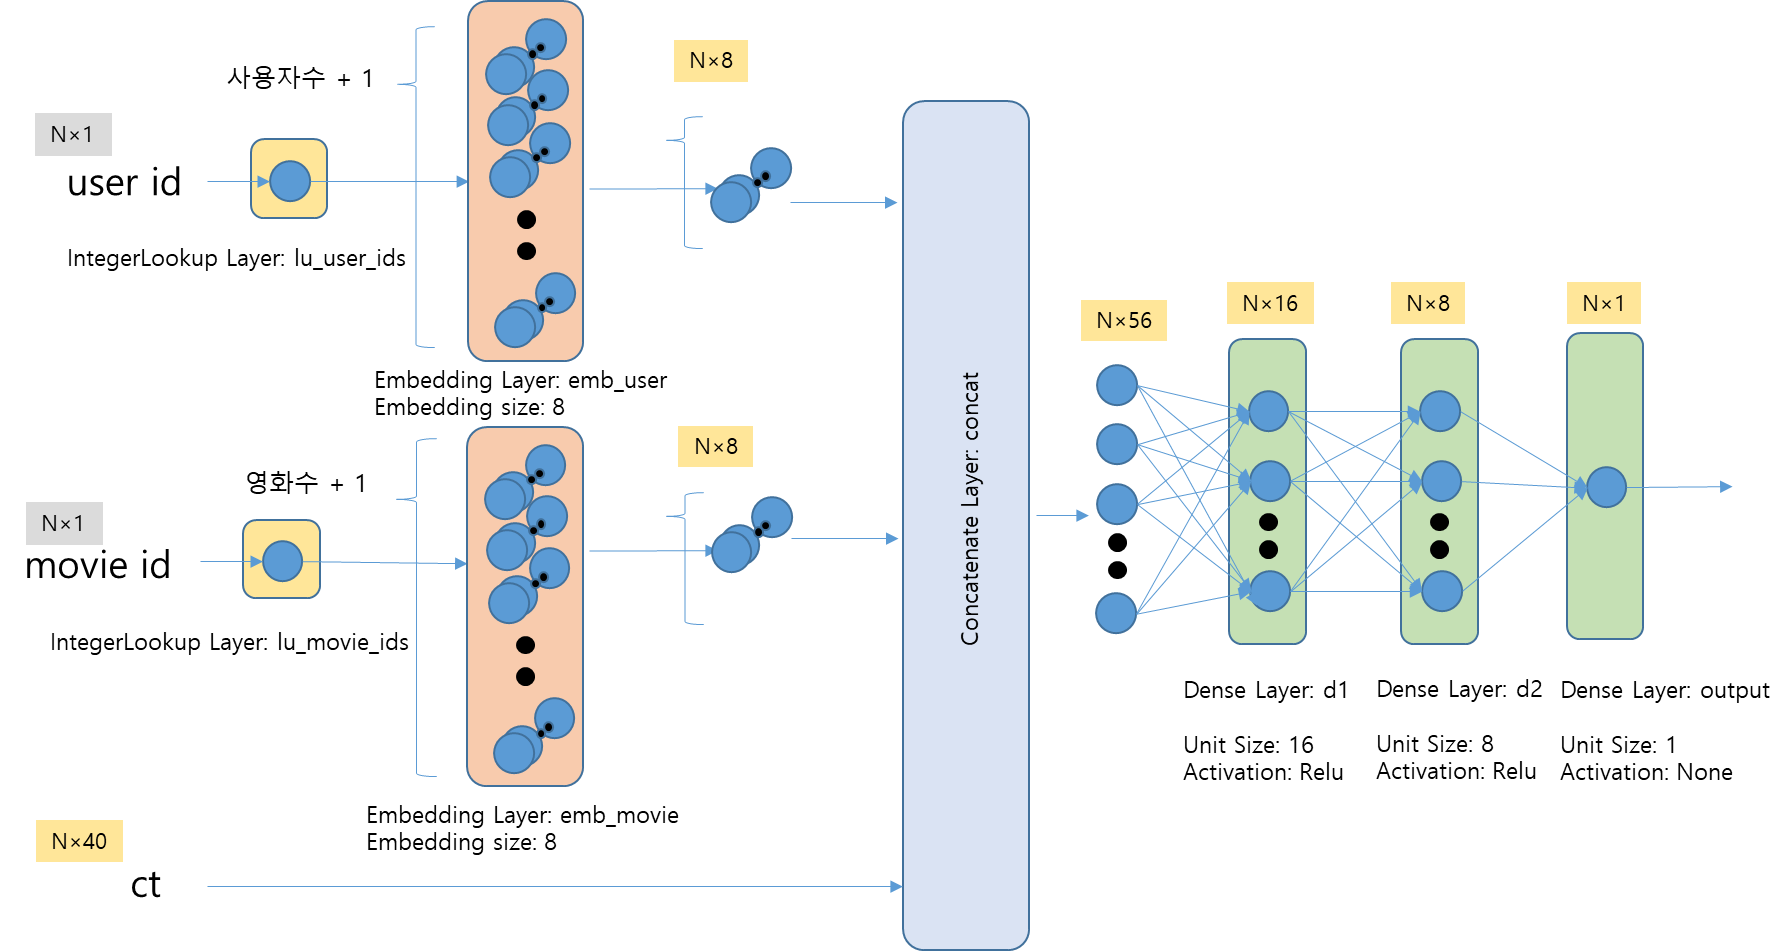

**N**: 배치 사이즈(batch size)

**ct**: 사용자 직업, 성별 가변수와 영화의 장르 여부 데이터

In [ ]:
df_train_2.head()

user id와 item id는 모두 정수형 인덱스 입니다.

Embedding Layer와 IntegerLookup Layer를 이용하여 user id와 item id를 임베딩으로 나타내는 네트워크를 디자인해 보겠습니다.

**Embedding Layer**

(범주의 개수) × (임베딩 벡터 크기)의 **학습이 가능한 Tensor**를 지니고 있으며

0-기반 위치 인덱스를 사용합니다.  

In [ ]:
# 범주의 수가 4개 이고, 벡터 크기가 2인 임베딩 레이어를 만들어 봅니다.

emb_test = tf.keras.layers.Embedding(4, 2)

# 0, 1, 2, 3 범주의 임베딩을 가져옵니다.
emb_test(tf.constant([0, 1, 2, 3]))

In [ ]:
emb_test.get_weights()

**IntegerLookup Layer**

범주형 변수의 수준이 정수형 ID로 되어있을 때, 정수형 ID를 0-기반 위치 인덱스 변환 할 때 사용합니다.

범주형 변수이 포함한 수준들을 vocabulary라고 합니다.

vocabulary에 없는 수준이 입력되면 기본적으로 0을 반환합니다.

tf.keras.layers.IntegerLookup 

In [ ]:
# IntegerLookup의 기능을 확인합니다.
# vocabulary가 [100, 200, 300] 일때,
# 입력값이 [100, 300, 1, 200] 의 출력을 확인해 봅니다.

lookup_test = tf.keras.layers.IntegerLookup(
    vocabulary=[100, 200, 300]
)

lookup_test(
    tf.constant([100, 300, 1, 200])
)

**IntegerLookup Layer + Embedding Layer**

사전에 없는 범주(Out-of Vocabulary) 까지 포함하여 임베딩 사이즈를 (범주수 + 1) x (임베딩 사이즈)로 설정합니다.

In [ ]:
# vocabulary가 [100, 200, 300]인 정수이고,
# 범주의 숫자가 3이고 임베딩 벡터의 수가 3개 인 임베딩 층을 만듭니다. 
# 이 때 OOV인 범주도 고려합니다.

# lookup_test = 
# emb_test = 

# 1차원 입력 변수[100, 300, 1, 300]의 임베딩 벡터를 출력해봅니다.
# x = tf.constant([100, 300, 1, 300])
# x = lookup_test(x) 
# x = emb_test(x)
# x

In [ ]:
# emb_test.get_weights()

**네트워크 일부분만 가져오겠습니다. 아래 네트워크만 우선 구현해 봅니다.**

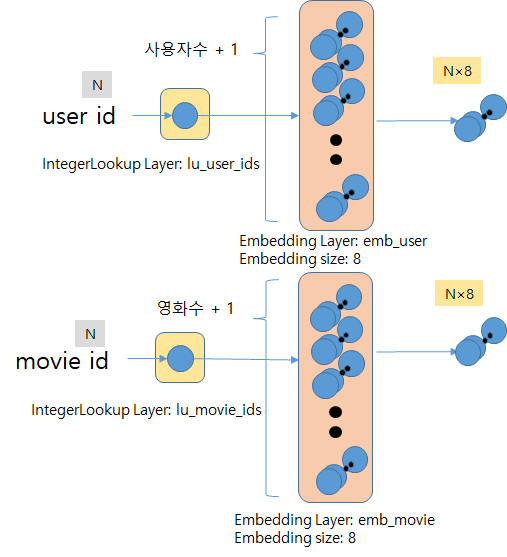

In [ ]:
"""
lu_userid = tf.keras.layers.IntegerLookup(
    vocabulary = # TODO: df_train에 등장하는 user id로 vocabulary를 만듭니다.
)

emb_user = tf.keras.layers.Embedding(
    # TODO: OOV를 감안하여 vocabulary size에 1을 더해줍니다.
    8
)

# df_train_2에서 처음 5행의 user id
x = tf.constant(df_train_2.head()['user id'])
x = lu_userid(x)
x = emb_user(x)
x"""

In [ ]:
# 영화에 대한 Embedding으로 인코딩해 봅니다.
"""
lu_movieid = tf.keras.layers.IntegerLookup(
    vocabulary = # TODO: df_train에 등장하는 item id로 vocabulary를 만듭니다.
)

emb_movie = tf.keras.layers.Embedding(
    # OOV를 감안하여 1을 더해줍니다.
    8
)

x = tf.constant(df_train_2.head()['item id'])
x = lu_movieid(x)
x = emb_movie(x)
x
"""

**Concatenate layer**

입력 받는 tensor 들을 결합하여 하나의 tensor로 만듭니다.

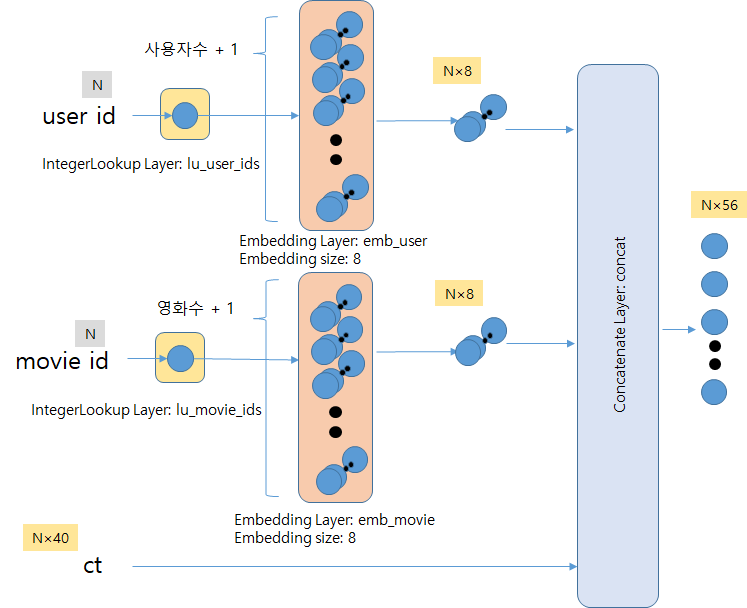

In [ ]:
# ct 값을 만들기한 ColumnTransformer를 만듭니다.
# Genre와 직업, 성별을 변환기를 설정합니다.
ct = ColumnTransformer([
    ('pt', 'passthrough', X_genre),
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']),
])

ct_cols = X_genre + ['occupation', 'gender']
# 학습시킵니다.
ct.fit(df_train_2[ct_cols])
print("ct values size: {}".format(len(ct.get_feature_names_out())))

In [ ]:
# 처음 5줄에 대한 ct 변환값을 가져옵니다.
x_ct = ct.transform(df_train_2.head()[ct_cols])
x_ct, x_ct.shape

**Concatenate Layer**

tf.keras.layer.Concatenate(axis=결합의 기준이 되는 축(차원))

In [ ]:
# 테스트를 위해 처음 부분의 user id를 가져옵니다.
x_user = tf.constant(df_train_2.head()['user id'])
x_user = lu_userid(x_user)
x_user = emb_user(x_user)

# 테스트를 위해 처음 부분의 item id를 가져옵니다.
x_movie = tf.constant(df_train_2.head()['item id'])
x_movie = lu_movieid(x_movie)
x_movie = emb_movie(x_movie)

# ColumnTransformer의 출력을 가져옵니다.
x_ct = tf.constant(
    ct.transform(df_train_2.head()[ct_cols])
)

x_user.shape, x_movie.shape, x_ct.shape

In [ ]:
# axis = -1 마지막 차원끼리 결합을 시키는 layer를 만듭니다.
concat = tf.keras.layers.Concatenate(axis=-1)

In [ ]:
# 3개의 입력값 x_user, x_movie, x_ct를 결합시킵니다.

x_concat = concat([x_user, x_movie, x_ct])
x_concat

**밀도레이어로 은닉층을 구성합니다.**

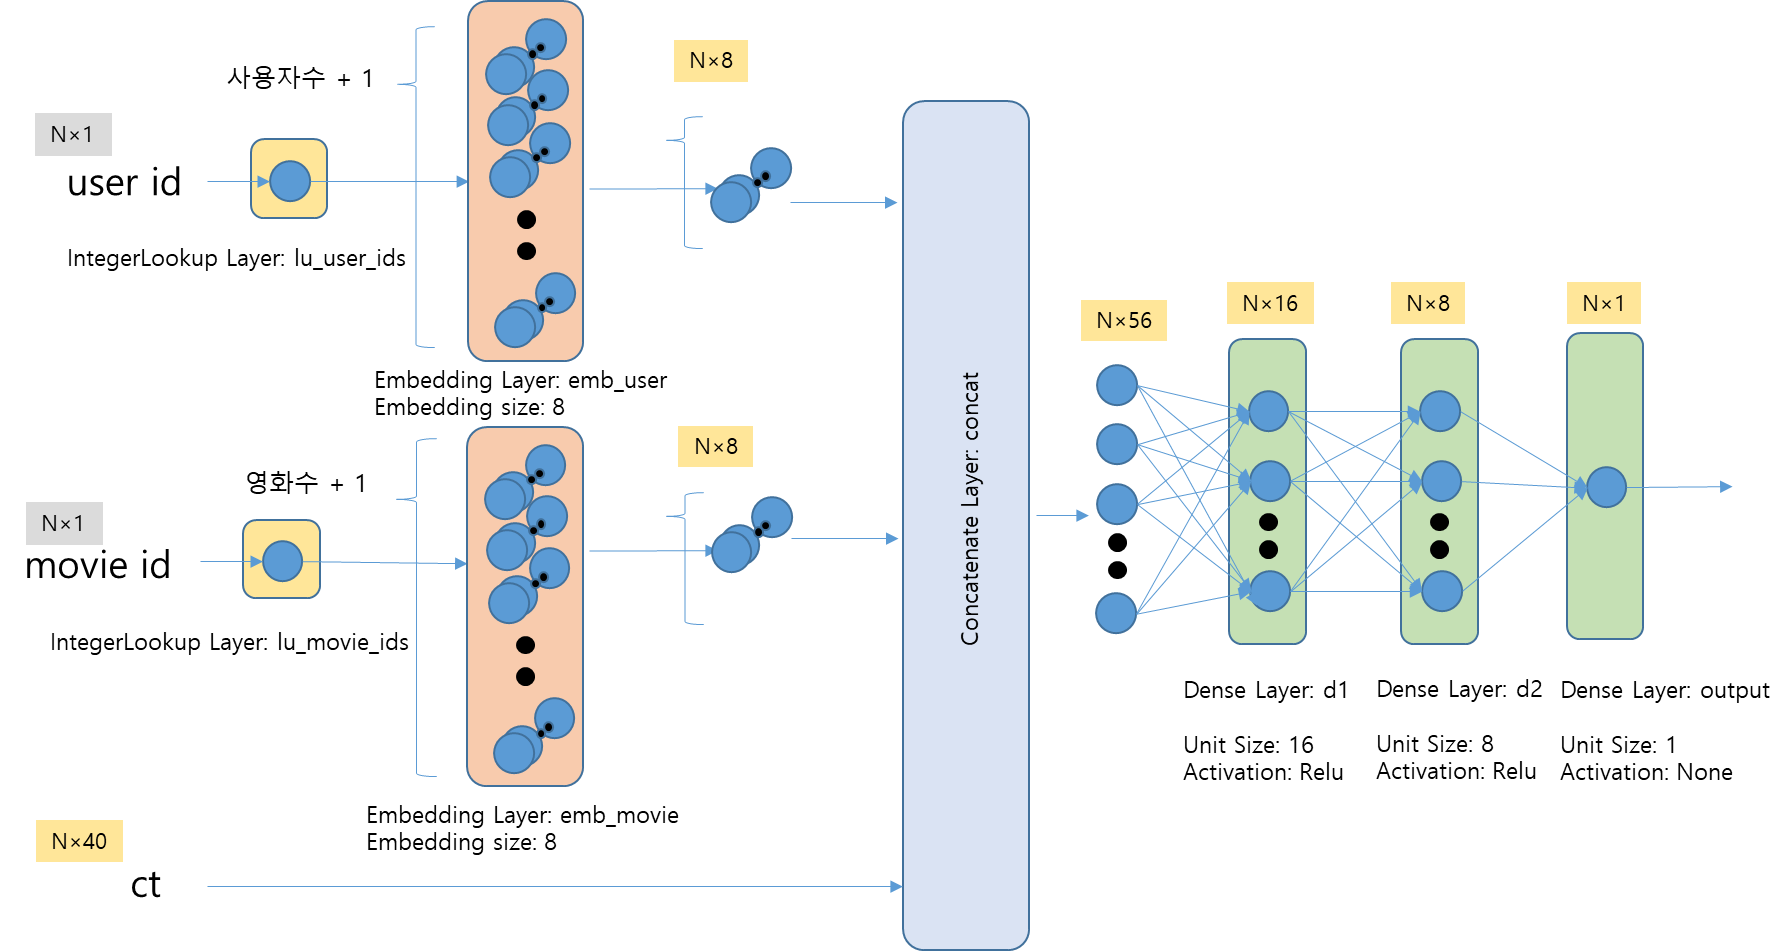

**밀도레이어**

입력과 출력이 weight와 곱으로 연결된 레이어

$O = W_{{n\_out}×{n\_in}} @ I$, 

@: 행렬곱, n_in: 입력 수, n_out: 출력 수

**tf.keras.layers.Dense(출력 수, activation=활성화 함수, kernel_initializer=weight 초기화 방법)**

activation: 'relu', 'sigmoid', 'tanh', ...

kernel_initialzier: 

보통은 glorot_uniform 

sigmoid, tanh와 같이 대칭 형태의 활성화 함수 - glorot_normal

relu와 같이 비대칭 - he_uniform

In [ ]:
dense1 = tf.keras.layers.Dense(
    16,
    activation='relu',
    kernel_initializer='he_uniform' # relu에 효과가 좋은 초기화 모듈인 he_uniform을 설정합니다.
)

In [ ]:
dense2 = tf.keras.layers.Dense(
    8, 
    activation='relu',
    kernel_initializer='he_uniform' # relu에 효과가 좋은 초기화 모듈인 he_uniform을 설정합니다.
)

In [ ]:
o = tf.keras.layers.Dense(
    1, 
    kernel_initializer='glorot_uniform'
)


In [ ]:
x_h = dense1(x_concat)
x_h = dense2(x_h)
y_hat = o(x_h)
y_hat

In [ ]:
losses = tf.keras.losses.MeanSquaredError()
losses(df_train_2.head()['rating'], y_hat)

**Tensorflow model**

입력과 출력, 레이어 그리고 모델들로 구성된 Tensorflow 객체

모델 작성 방법

모델의 클래스는 tf.keras.Model을 상속받습니다.

생성자 작성: 여러가지 초기화 작업을 합니다.

    부모클래스의 생성자를 호출합니다.
    
    모델을 위한 초기화 루틴을 작성합니다.
    
    모델 레이어들의 instanace를 생성합니다.

call 메소드 작성: 모델 layer의 호출 플로우를 구현합니다. 

    입력 Tensor를 매개 변수로 정의합니다.
    
    training=False를 기본 매개 변수로 둡니다.
    
    정의한 레이어의 호출 플로우를 작성합니다.
    
    출력 텐서를 반환합니다.

In [ ]:
class RatingModel(tf.keras.Model):
    def __init__(self, user_ids, movie_ids):
        """
        RatingModel 생성자입니다.
        Parameters:
            user_ids: array-like
                등장한 user_id 수준 리스트
            movie_ids: array-like
                등장한 movie_id 수준 리스트
        """
        super().__init__() # 부모 클래스의 생성자를 호출합니다.
        
        # user id들을 사전으로 구성하여 user id를 입력을 받아 이를 1부터 시작하는 인덱스로 변환해주는 Layer를 생성합니다. OOV: 0
        self.lu_user_ids = tf.keras.layers.IntegerLookup(vocabulary=tf.constant(user_ids))
        # movie id들을 사전으로 구성하여 user id를 입력을 받아 이를 1부터 시작하는 인덱스로 변환해주는 Layer를 생성합니다. OOV: 0
        self.lu_movie_ids = tf.keras.layers.IntegerLookup(vocabulary=tf.constant(movie_ids))
        
        # 사용자 임베딩을 생성합니다.
        self.emb_user = tf.keras.layers.Embedding(len(user_ids) + 1, 8) # OOV를 포함하여 사용자수 + 1입니다.
        # 영화 임베딩을 생성합니다.
        self.emb_movie = tf.keras.layers.Embedding(len(movie_ids) + 1, 8)
        
        # Concatenate Layer 생성합니다.
        self.concat = tf.keras.layers.Concatenate()
        
        # Dense Layer 1 생성합니다.
        self.d1 = tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform')
        # Dense Layer 2 생성합니다.
        self.d2 = tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform')
        # 출력 Layer를 생성합니다.
        self.o = tf.keras.layers.Dense(1)
    
    def call(self, x, training=False):
        """
        모델을 호출합니다.
        Parameters: 
            x: dict-like
                'user_id': shape이 N인 user_id 텐서
                'movie_id': shape이 N인 movie_id 텐서
                'ct': shape이 N×40인 ct 전처리기를 거친 변환된 텐서
        """
        x_user = self.lu_user_ids(x['user_id']) # 사용자 ID에서 임베딩 인덱스로 변환합니다. x['user_id'] N 정수 / x_user: N 정수
        x_user = self.emb_user(x_user) # x_user에 해당하는 임베딩을 반환합니다. x_user: N×8 정수
        x_movie = self.lu_movie_ids(x['movie_id']) # 영화 ID에서 임베딩 인덱스로 변환합니다. x['movie_id'] N 정수 / x_movie: N 정수
        x_movie = self.emb_movie(x_movie) # x_movie에 해당하는 임베딩을 반환합니다. x_movie: N×8 정수
        x = self.concat([x_user, x_movie, x['ct']]) # x_user, x_movie, X['ct']을 결합합니다. X['ct']: N×40, x: N×56
        x = self.d1(x) # x: N×16
        x = self.d2(x) # x: N×8
        return self.o(x) # x: N×1

In [ ]:
# 5-fold cross validation을 합니다.

valid_scores_ =  []
for train_idx, test_idx in cv.split(df_train_2):
    print('Fold #{}'.format(len(valid_scores_) + 1))
    tf.keras.backend.clear_session() # Tensorflow 세션을 초기화 합니다.
    reg_nn_rating = RatingModel(
        df_train_2['user id'].unique(), 
        df_train_2['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.tolist()) # item id의 출현 빈도가 5 이상인 것만 뽑습니다.
    )   
    ds_train_2 = df_train_2.iloc[train_idx].pipe(
        lambda x: tf.data.Dataset.from_tensor_slices(
                ({'user_id': x['user id'], 'movie_id': x['item id'], 'ct': ct.transform(x)},
                  x['rating'])
            ).shuffle(10000).batch(128)
    ) # 검증 학습셋 Dataset을 만듭니다

    ds_valid_2 = df_train_2.iloc[test_idx].pipe(
        lambda x: tf.data.Dataset.from_tensor_slices(
                ({'user_id': x['user id'], 'movie_id': x['item id'], 'ct': ct.transform(x)},
                  x['rating'])
            ).batch(128)
    ) # 검증 테스트셋 Dataset을 만듭니다.
    
    # 모델 학습 설정을 합니다.
    reg_nn_rating.compile(
        optimizer= tf.keras.optimizers.Adam(), # Adam Optimizer를 사용합니다.
        loss=tf.keras.losses.MeanSquaredError() # 평균오차제곱합(Mean Squared Error)를 손실로 사용합니다.
    )
    # ds_train_2로 학습하고, ds_valid_2를 검증셋으로 설정합니다. 총 10회 train 셋에 대한 학습을 반복합니다.
    reg_nn_rating.fit(ds_train_2, validation_data=ds_valid_2, epochs=10) 
    # 검정 테스트셋의 성능을 측정합니다.
    valid_scores_.append(r2_score(df_train_2.iloc[test_idx]['rating'], reg_nn_rating.predict(ds_valid_2)))
del ds_train_2, ds_valid_2
valid_scores_

In [ ]:
np.mean(valid_scores_)

In [ ]:
# 전체 Train에 학습하고 Test로 평가합니다.
tf.keras.backend.clear_session()
reg_nn_rating = RatingModel(
    df_train_2['user id'].unique(), 
    df_train_2['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.tolist())
)
reg_nn_rating.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.MeanSquaredError(),
)

ds_train_2 = tf.data.Dataset.from_tensor_slices(
            ({'user_id': df_train_2['user id'], 'movie_id': df_train_2['item id'], 'ct': ct.transform(df_train_2)},
              df_train_2['rating'])
        ).shuffle(10000).batch(128)

ds_test_2 = tf.data.Dataset.from_tensor_slices(
            ({'user_id': df_test_2['user id'], 'movie_id': df_test_2['item id'], 'ct': ct.transform(df_test_2)},
              df_test_2['rating'])
        ).batch(128)
reg_nn_rating.fit(ds_train_2, validation_data=ds_test_2, epochs=10)
r2_score(df_test_2['rating'], reg_nn_rating.predict(ds_test_2))

In [ ]:
reg_nn_rating.summary()

In [ ]:
# 추출한 내용을 Tensorflow Projector를 통해 확인해 봅니다.

import os
import tensorflow as tf
from tensorboard.plugins import projector
%load_ext tensorboard

In [ ]:
# 신경망을 통해 학습된 Movie Embedding을 시각화해봅니다.
log_dir='logs/nn_basic/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# 영화의 타이틀을 기록합니다.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for i in df_movie.loc[
            df_train_2['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.tolist()),
            'movie title'
        ]:
        f.write("{}\n".format(i))

# 임베딩 내용중 OOV에 해당하는 첫번째 벡터를 제외하고 기록합니다.
weights = tf.Variable(reg_nn_rating.emb_movie.get_weights()[0][1:])
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))


config = projector.ProjectorConfig()
embedding = config.embeddings.add()

embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

저장한 내용을 텐서보드로 시각화해봅니다.

wsl 커맨드 창에서, notebook이 있는 경로로 이동하여 

아래 커맨드를 실행시켜 tensorboard 서버를 구동시킵니다.

```bash
tensorboard --logdir logs/nn_basic/ --bind_all
```

브라우져에서, http://localhost:6006 에 접근하면 

tensorboard 사이트에 접근하여, 우측 상단에 드롭 박스에 Projector를 선택하면, 

Embedding을 3차원 공간에 투영시킨 시각화 결과를 볼 수 있습니다.

# (비모수적 모델) Non-Parametric Model

## 결정 나무(Decision Tree)

 입력에 대한 판단 과정을 트리 구조로 나타낸 모델
 
 단말노드는 트리의 출력내용을 정의하고, 일반노드는 입력값에 대한 다음 자식 노드를 이동하기 위한 노드분기 조건을 나타냅니다.
 
 결정 나무는 학습셋에 있는 패턴을 나타내기 위해 트리 구조를 확장해 나가는 특징이 있어,
 
 트리의 크기를 제한하기 위한 설정을 하지 않으면 학습셋에 대하여 최고의 성능을 나타낼 수 있습니다.
 
 ⇒ 과적합이 쉽게 발생합니다.
 
**모수적 모델에 비한 단점** 학습 데이터셋 전체를 메모리에 올려야 하므로, 커다란 데이터로 학습시키려면 많은 연산 자원이 필요합니다.

# 앙상블 모델

- 일반화 성능 향상을 위해 여러 모델을 결합한 모델 

## Boosting 

- 이전까지 결합된 모델의 손실(Loss)을 줄이는 모델을 결합해가는 앙상블 기법

## Bagging 

- 모델의 변동성을 줄이기 위해 Boostrapping을 통하여 다수의 모델을 만들어 변동성 줄이는 앙상블 기법

### LightGBM 으로 추천에 사용해 볼만한 모델을 만들어 봅시다. 


**LightGBM** : Microsoft Researcher를 중심으로 만든 Gradient Boosting Tree 모델입니다.

연속형 변수를 Histgram 기반으로 구간화하여 모델의 속도를 비약적으로 향상시킴과 동시에,

기본적인 설정으로도 상당한 성능을 얻을 수 있고, 튜닝을 통항 성능 향상을 기대할 수 있는 강력한 머신 러닝 모델입니다.

Tabular 데이터(레코드는 행단위로 변수들은 열단위로 구성된 2차원 데이터)에 강력한 성능을 발휘합니다.

데이터셋을 만들어 봅니다.

df_train셋에서 like 변수를 rating이 사용자의 rating 평균 이상이면 True 아니면 False로 정의하여 df_train_3 셋을 만듭니다.

사용자의 장르별 선호도를 구하기 위해 df_train_3에 df_movie와 결합합니다.

사용자가 장르별로 like를 보인 비율을 측정하고 이를 예측에 활용합니다.

사용자의 직업, 성별을 활용하기 위해 사용자 성별 정보도 결합합니다.

모수적 모델에 대한 연구가 핵심이므로,

검정에 시간을 투자하지 않고, 학습과 테스트만 해봅니다.

사용만 해보고 갑니다.

In [ ]:
# like를 만듭니다.
df_train_3 = df_train.assign(
    like = df_train.groupby('user id')['rating'].transform('mean') < df_train['rating']
)

# test는 train에서 측정한 사용자별 평균을 기준으로 like를 구합니다.
df_test_3 = df_test.assign(
    like = lambda x: x['user id'].map(df_train.groupby('user id')['rating'].mean()) < x['rating']
).dropna()

# Genre별 선호비율 조사하기위해 genre를 결합시킵니다.
# 추가적으로 사용자 정보도 결합시킵니다.
X_genre = df_movie.columns[2:].tolist()
df_train_3 = df_train_3.join(df_movie[X_genre], on='item id').join(df_user, on='user id')
df_test_3 = df_test_3.join(df_movie[X_genre], on='item id').join(df_user, on='user id')

In [ ]:
# df_train_3에서 사용자별 장르의 선호도 변수르 뽑아 봅니다.

# 영화별 여러 장르가 있으므로, 먼제 melt를 통해 user id별, genre, like 여부인 컬럼을 구성합니다.
# 피벗팅을 이용하여 사용자 장르별 like비율을 만듭니다.
# 결측치는 0으로 채웁니다.
df_user_genre = df_train_3[['user id', 'like']  + X_genre].melt(id_vars=['user id', 'like'], var_name='genre').pipe(
    lambda x: x.loc[x['value'] == 1, ['user id', 'like', 'genre']]
).pivot_table(
    index='user id', columns='genre', values='like', aggfunc='mean'
).fillna(0).rename(columns=lambda x: x + '_mean')
X_genre_mean = df_user_genre.columns.tolist()
df_user_genre.head(1)

In [ ]:
# df_train_3와 df_test_3에  df_user_genre를 결합시킵니다.

df_train_3 = df_train_3.join(df_user_genre, on='user id', how='inner')
df_test_3 = df_test_3.join(df_user_genre, on='user id', how = 'inner')
display(df_train_3.head())
display(df_test_3.head())

In [ ]:
import lightgbm as lgbm
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

X_genre = df_movie.columns[2:].tolist()
X_lgb = [i for i in df_train_3.columns if i not in['date', 'like', 'zip code', 'rating']]
ct = ColumnTransformer([
    ('tge', TargetEncoder(target_type='binary'), ['user id', 'item id']),
    ('ohe', OneHotEncoder(), ['gender', 'occupation']),
    ('pt', 'passthrough', [i for i in X_lgb if i not in ['gender', 'occupation', 'user id', 'item id']])
])
clf_lgb = make_pipeline(
    ct, 
    lgbm.LGBMClassifier(random_state=123, verbose=-1)
)
clf_lgb.fit(df_train_3[X_lgb], df_train_3['like'])

(
    roc_auc_score(df_train_3['like'], clf_lgb.predict_proba(df_train_3[X_lgb])[:, 1]),
    roc_auc_score(df_test_3['like'], clf_lgb.predict_proba(df_test_3[X_lgb])[:, 1]),
)

In [ ]:
sns.barplot( 
    data=pd.DataFrame({
        'name': clf_lgb[0].get_feature_names_out(),
        'importance': clf_lgb[1].feature_importances_
    }).sort_values('importance', ascending=False).iloc[:30],
    x='importance', y='name'
)
plt.show()

**참고용 코드**

5겹의 교차 검증을 통한 평가 루틴입니다.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# like를 만듭니다.
df_train_3 = df_train.assign(
    like = df_train.groupby('user id')['rating'].transform('mean') < df_train['rating']
)

# test는 train에서 측정한 사용자별 평균을 기준으로 like를 구합니다.
df_test_3 = df_test.assign(
    like = lambda x: x['user id'].map(df_train.groupby('user id')['rating'].mean()) < x['rating']
).dropna()

# Genre별 선호비율 조사하기위해 genre를 결합시킵니다.
# 추가적으로 사용자 정보도 결합시킵니다.
X_genre = df_movie.columns[2:].tolist()
df_train_3 = df_train_3.join(df_movie[X_genre], on='item id').join(df_user, on='user id')
df_test_3 = df_test_3.join(df_movie[X_genre], on='item id').join(df_user, on='user id')

# 5-fold cross validation을 합니다.

cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model(model, X):
    train_scores_ = []
    valid_scores_ = []
    for train_idx, test_idx in cv.split(df_train_3):
        df_cv_train = df_train_3.iloc[train_idx]
        df_cv_test = df_train_3.iloc[test_idx]
        # CV train set에서 선호도를 구합니다.
        df_user_genre = df_cv_train[['user id', 'like']  + X_genre].melt(id_vars=['user id', 'like'], var_name='genre').pipe(
            lambda x: x.loc[x['value'] == 1, ['user id', 'like', 'genre']]
        ).pivot_table(
            index='user id', columns='genre', values='like', aggfunc='mean'
        ).fillna(0).rename(columns=lambda x: x + '_mean')
        X_genre_mean = df_user_genre.columns.tolist()
        # CV train에서 구한 통계치를 적용합니다.
        df_cv_train = df_cv_train.join(df_user_genre, on='user id', how='left').fillna(0)
        # CV test에는 CV train에서 구한 통계치를 적용합니다.
        df_cv_test = df_cv_test.join(df_user_genre, on='user id', how='left').fillna(0)
        
        model.fit(df_cv_train[X], df_cv_train['like'])
        train_scores_.append(roc_auc_score(df_cv_train['like'], model.predict_proba(df_cv_train[X])[:, 1]))
        valid_scores_.append(roc_auc_score(df_cv_test['like'], model.predict_proba(df_cv_test[X])[:, 1]))
    return train_scores_, valid_scores_

In [ ]:
import lightgbm as lgbm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

X_genre = df_movie.columns[2:].tolist()
X_lgb = [i for i in df_train_3.columns if i not in['date', 'like', 'zip code', 'rating']] + X_genre_mean
ct = ColumnTransformer([
    ('tge', TargetEncoder(target_type='binary'), ['user id', 'item id']),
    ('ohe', OneHotEncoder(), ['gender', 'occupation']),
    ('pt', 'passthrough', [i for i in X_lgb if i not in ['gender', 'occupation', 'user id', 'item id']])
])
clf_lgb = make_pipeline(
    ct, 
    lgbm.LGBMClassifier(random_state=123, verbose=-1)
)
eval_model(clf_lgb, X_lgb)

# 비지도 학습

- 군집화(Clustering ): 비슷한 속성을 지닌 데이터 포인트를 그룹화하는 과정

- 차원축소(Dimension Reduction): 정보의 손실을 최소화하여 데이터의 변수의 수를 줄이는 과정

**예제: 차원 축소 기법을 활용한 초간단 텍스트 마이닝**

영화 줄거리 데이터에서, Bag-of-words 모델 + TF-IDF 변환 + TruncatedSVD 모델을 이용한 텍스트 임베딩 추출

> Bag-of-words : 문서를 단어들의 출현 빈도로 나타냅니다.

> TF-IDF 변환: 단어 빈도수를 전체 문서들에서 두루 나오는 단어의 가중치를 낮추어 변환합니다.

> TruncatedSVD: 입력 변수의 수를 줄입니다.

→ LSA(Latent Semantic Allocation) model

In [ ]:
with open('dataset/tmdb_movie_info_kr.pkl', 'rb') as f:
    movie_info_kr = pkl.load(f)

In [ ]:
movie_info_kr[1]['overview']

한글 형태소 분석기: 어절에서 형태소 단위의 분리를 해주며, 이와 함께  형태소의 품사를 제공합니다.

[KIWI](https://github.com/bab2min/kiwipiepy)

In [ ]:
# 한글 형태소 분석기: 형태소 분석기를 통해 어절에서 단어를 추출합니다. 

from kiwipiepy import Kiwi
from tqdm import tqdm
kiwi = Kiwi()

In [ ]:
kiwi.analyze(movie_info_kr[1]['overview'])

단어 자체만으로 의미를 지닌다고 보기 힘든, 조사(tag가 J로 시작) 어미(tag가 E로 시작), 접미사(tag X로 시작), 문장부호(tag S로 시작) 주격보어(VCP) 하는 단어들은 불용어 처리합니다.

In [ ]:
words = [t.form for t in kiwi.tokenize(movie_info_kr[1]['overview']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
words

In [ ]:
# Document(doc): 영화 한 편의 줄거리와 제목 
# 각각의 Documenst들에서 불용어를 제외한 단어를 추출합니다.
doc_ids = []
docs = []
for k, v in tqdm(movie_info_kr.items()):
    words = [t.form for t in kiwi.tokenize(v['title']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
    words += [t.form for t in kiwi.tokenize(v['overview']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
    doc_ids.append(k)
    docs.append(words)

In [ ]:
# 처음 두 개의 Document의 내용을 뽑아봅니다.
docs_str = [' '.join(i) for i in docs]
docs_str[:2]

In [ ]:
# CountVectorizer: Bag of Words Model의 sklearn version 입니다.
from sklearn.feature_extraction.text import CountVectorizer
# Document Frequency: 최소 3개의 문서에서 등장한 단어를 Vocabulary에 포함합니다.
cnt_vec = CountVectorizer(min_df=3)
cnt_vec.fit(docs_str)

In [ ]:
# Vocabulary에 22577(KIWI 형태소 분석기 버젼에 따라 수치가 다를 수있습니다)개의 단어가 포함 됐습니다.
len(cnt_vec.vocabulary_)

In [ ]:
[docs_str[0]]

In [ ]:
# 첫번째 문장만의 변환값을 가져옵니다.
vec = cnt_vec.transform([docs_str[0]])[0]
# 단어 출현빈도를 출력해 봅니다.
for k, l in zip(vec.data, cnt_vec.get_feature_names_out()[vec.indices]):
    print(l, k)

TFIDF 변환을 통해 두루 나오는 단어의 가중치를 낮춰줍니다.

$tf(t, d)  = \frac{f_{t,d}}{\sum_{t'∈f_{f',d}}f_{t',d}}$

$idf(t, D) = \log{\frac{N}{|\{d∈D: t∈d\}|}}$

$tfidf(t, d, D) = tf(t,d)\cdot idf(t, D)$

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_tf = TfidfTransformer()

In [ ]:
tfidf_tf.fit(cnt_vec.transform(docs_str))

In [ ]:
vec = tfidf_tf.transform(cnt_vec.transform([docs_str[0]]))[0]
for k, l in zip(vec.data, cnt_vec.get_feature_names_out()[vec.indices]):
    print(l, k)

In [ ]:
vec, len(docs_str)

CountVectorizer → TFIDF 를 거쳐나온 문서 Matrix의 사이즈는 |D|×|V| , |D|: 문서수 |D|=61571, |V|: 단어수, |V| = 22266

TruncatedSVD를  이용하여, 문서 Matrix의 사이즈를 축소시킵니다.

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
from sklearn.pipeline import make_pipeline

# LSA(Latent Semantic Allocation)
# CountVectorizer → TFIDF → TruncatedSVD
lsa = make_pipeline(
    CountVectorizer(min_df=3), # 3개 이상의 문서가 나오는 단어를 사전에 포함시키는 Bag-of-Word 모델 변환기를 설정합니다.
    TfidfTransformer(), # TF-IDF 변환기를 설정합니다.
    TruncatedSVD(128) # Truncated SVD 모델을 사용하여, 22266개에서 128개로 사이즈를 축소시킵니다.
)
lsa.fit(docs_str)

In [ ]:
lsa.transform(docs_str[:2]).shape

In [ ]:
# 전체의 변동성(정보) 중에서 512 차원의 데이터가 설명하는 변동성(정보)를 구합니다.
np.sum(lsa[2].explained_variance_ratio_)

In [ ]:
# 추출한 내용을 Tensorflow Projector를 통해 확인해 봅니다.

import os
import tensorflow as tf
from tensorboard.plugins import projector
%load_ext tensorboard

In [ ]:
# Tensorboard에 출력할 내용이 담긴 폴더를 설정합니다.
log_dir='logs/lsa/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Embedding과 출력될 Metadata를 기록합니다.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for i in doc_ids:
        f.write("{}\n".format(movie_info_kr[i]['title']))

# Embedding의 내용을 설정합니다.
weights = tf.Variable(lsa.transform(docs_str))
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# 설정에 따라 임베딩을 기록합니다.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [ ]:
# 이 경우에는 wsl 커맨드 창을 통해  tensorboard를 구동한 방법은 
# 서버를 종료할 때에 서버 Process를 구동 시킨 wsl 창에서
# 서버를 직접 종료하면 됩니다지만(Ctrl + C)
# 아래 방법은 Notebook 창에서 tensorboard를 직접 구동시키는 방법인데요,
# wsl 환경에서는 서버가 정상적으로 종료 되지 않고 ghost processing가 되어 버려서
# wsl 환경에서 진행하신다면 아래 명령을 수행하는 것을 권장하지 않습니다.
# 이 경우에는 wsl 커맨드 창을 통해 구동하는 것을 권장합니다.

# %tensorboard --logdir logs/lsa/ --bind_all

In [ ]:
# tensorboard 서버 process 번호를 조회합니다.
# !ps -ef|grep tensorboard

In [ ]:
# tensorboard Process를 조회 후 Process를 종료시킵니다.
# !kill 21616